## ¿Qué grupo socioeconómico resultó más afectado por el terremoto del 2010?

### Librerias


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os

### Load Dataframe


In [2]:


with open('pkl-data/adm_lista.pkl', 'rb') as lectura:
    adm = pickle.load(lectura)

### Codigo 

In [3]:
datos_dependencia = []
for x in range(2007, 2014):
    y = x - 2004
    if y < len(adm):
        df = adm[y]
        cols_dep = [col for col in df.columns if 'DEPEND' in col.upper() or 'GRUPO' in col.upper()]
        if cols_dep:
            col_dependencia = cols_dep[0]
            conteo = df[col_dependencia].value_counts().to_dict()
            total = len(df)
                
            for grupo, cantidad in conteo.items():
                if pd.notna(grupo) and grupo != 0:
                    datos_dependencia.append({
                        'ANO': x,
                        'GRUPO_DEPENDENCIA': grupo,
                        'CANTIDAD': cantidad,
                        'PORCENTAJE': (cantidad / total) * 100})
    
df_dependencia = pd.DataFrame(datos_dependencia)


In [4]:
df_dependencia

,ANO,GRUPO_DEPENDENCIA,CANTIDAD,PORCENTAJE
0,2007,2,95400,44.812085
1,2007,3,90186,42.362922
2,2007,1,24835,11.665704
3,2008,2,103326,47.340569
4,2008,3,88726,40.651330
5,2008,1,24828,11.375372
6,2009,2,117276,48.101588
7,2009,3,99685,40.886514
8,2009,1,25400,10.417991
9,2010,2,122721,48.461119


In [5]:
df_dependencia.columns

Index(['ANO', 'GRUPO_DEPENDENCIA', 'CANTIDAD', 'PORCENTAJE'], dtype='object')

#### Explicación
    El codigo recorrere los dataframes para luego agruparlos por codigo de dependencia y poner el porcentaje en columnas aparte. Luego se grafican.  

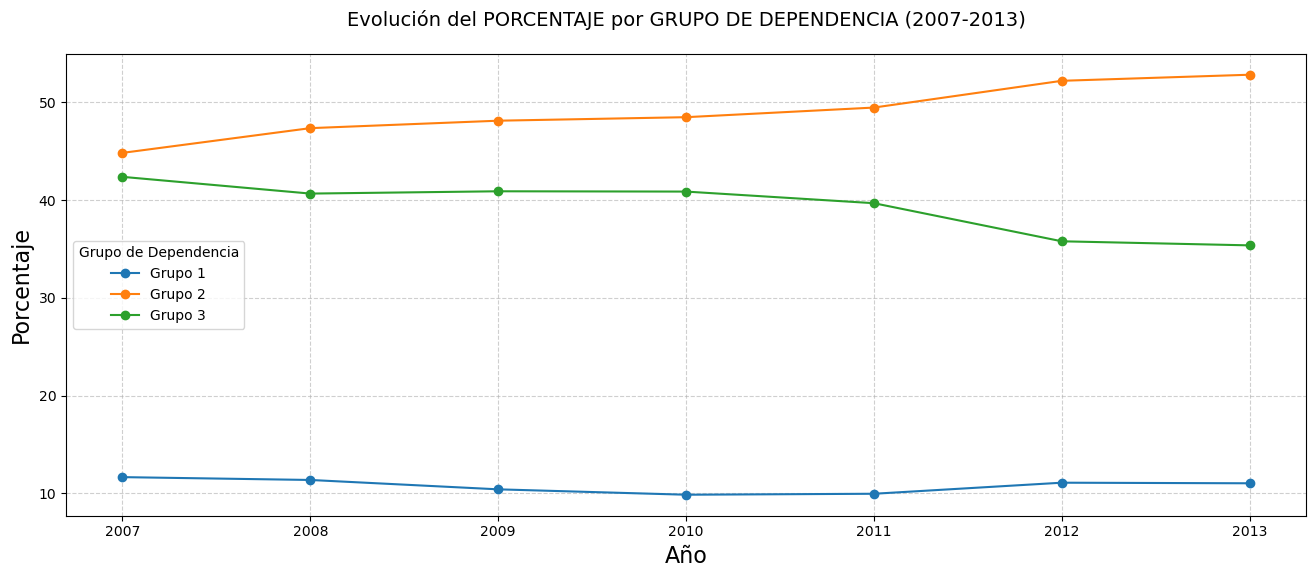

In [6]:
grupos = df_dependencia.groupby('GRUPO_DEPENDENCIA')

plt.figure(figsize=(16, 6))#define el tamaño del gráfico


for nombre_grupo, datos_grupo in grupos:
    plt.plot(
        datos_grupo['ANO'],
        datos_grupo['PORCENTAJE'],
        marker='o',#puntos para marcar los valores de cada año
        linestyle='-',
        label=f'Grupo {int(nombre_grupo)}')


plt.title('Evolución del PORCENTAJE por GRUPO DE DEPENDENCIA (2007-2013)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Porcentaje', fontsize=16)
plt.legend(title='Grupo de Dependencia', loc='best') #muestra la leyenda
plt.grid(True, linestyle='--', alpha=0.6) #añade una cuadrícula
ruta = os.path.join('graficos-imagenes', 'terremoto2010.png')
plt.savefig(ruta)#guardamos el grafico en su carpeta correspondiente



In [7]:
#GRUPO_DEPENDENCIA	Dependencia administrativa del establecimiento de egreso, según norma universidades.
#	1. Particular pagado
#	2. Particular subvencionado
#	3. Municipal





##    Conclusion

    Podemos ver claramente que el grupo mas afectado fue el grupo numero 3, que son los municipales. Ellos que son la linea de color verde es la unica que baja, mientras que el porcentaje del grupo 1 y 2, subo por la baja de ellos. Al abarcar menor terreno. Por lo cual ante catastrofes naturales o que puedan afectar a la poblacion, los mas afectados en termminos de educacion son los que tienen menos recursos o en este caso los que salieron de escuelas municipales.